In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | araguacu
Processing Record 6 of Set 1 | chumikan
Processing Record 7 of Set 1 | gao
Processing Record 8 of Set 1 | valdosta
Processing Record 9 of Set 1 | fredericksburg
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | daru
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | west wendover
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | alyangula
Processing Record 24 o

City not found. Skipping...
Processing Record 43 of Set 4 | chitrakonda
Processing Record 44 of Set 4 | amposta
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | rafai
Processing Record 47 of Set 4 | nalut
Processing Record 48 of Set 4 | puerto madryn
Processing Record 49 of Set 4 | karaul
City not found. Skipping...
Processing Record 50 of Set 4 | fonte boa
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | funtua
Processing Record 4 of Set 5 | barentu
Processing Record 5 of Set 5 | muroto
Processing Record 6 of Set 5 | campbell river
Processing Record 7 of Set 5 | belmonte
Processing Record 8 of Set 5 | jacqueville
Processing Record 9 of Set 5 | salalah
Processing Record 10 of Set 5 | ahipara
Processing Record 11 of Set 5 | ribeira grande
Processing Record 12 of Set 5 | urdoma
Processing Record 13 of Set 5 | stepnyak
Processing Record 14 of Set 5 | sulangan
Processing Record 15 of Set 5 | conceica

Processing Record 28 of Set 8 | anito
Processing Record 29 of Set 8 | byron bay
Processing Record 30 of Set 8 | asheville
Processing Record 31 of Set 8 | nizhniy odes
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | seydi
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | chongwe
Processing Record 37 of Set 8 | mazamet
Processing Record 38 of Set 8 | playas
Processing Record 39 of Set 8 | sur
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | puerto del rosario
Processing Record 42 of Set 8 | acapulco
Processing Record 43 of Set 8 | homer
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | pathein
Processing Record 46 of Set 8 | baiyin
Processing Record 47 of Set 8 | harper
Processing Record 48 of Set 8 | tyukhtet
Processing Record 49 of Set 8 | warqla
City not found. Skipping...
Processing Record 50 of Set 8 | iquique
Processing Record 1 of Set 9 | lo

Processing Record 16 of Set 12 | baiquan
Processing Record 17 of Set 12 | galesong
Processing Record 18 of Set 12 | vanimo
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | castanos
Processing Record 21 of Set 12 | turayf
Processing Record 22 of Set 12 | mandalgovi
Processing Record 23 of Set 12 | buchanan
Processing Record 24 of Set 12 | honningsvag
Processing Record 25 of Set 12 | leningradskiy
Processing Record 26 of Set 12 | bonavista
Processing Record 27 of Set 12 | portland
Processing Record 28 of Set 12 | alcaniz
Processing Record 29 of Set 12 | kedrovyy
Processing Record 30 of Set 12 | lund
Processing Record 31 of Set 12 | tura
Processing Record 32 of Set 12 | vestmannaeyjar
Processing Record 33 of Set 12 | sobolevo
Processing Record 34 of Set 12 | voh
Processing Record 35 of Set 12 | katsuura
Processing Record 36 of Set 12 | ust-kulom
Processing Record 37 of Set 12 | poum
Processing Record 38 of Set 12 | mulchen
Processing Record 39 of Set 12 | melilla


In [9]:
len(city_data)

565

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,75.25,73,20,6.91,CK,2021-07-25 05:12:06
1,Dunedin,-45.8742,170.5036,48.79,54,100,14.00,NZ,2021-07-25 05:12:07
2,Bethel,41.3712,-73.4140,73.51,80,40,4.61,US,2021-07-25 05:12:07
3,Alofi,-19.0595,-169.9187,77.81,79,19,9.69,NU,2021-07-25 05:12:08
4,Araguacu,-12.9306,-49.8264,69.66,40,0,5.59,BR,2021-07-25 05:12:08
5,Chumikan,54.7183,135.3150,60.87,97,98,0.85,RU,2021-07-25 05:12:08
6,Gao,16.6362,1.6370,77.31,67,52,8.30,ML,2021-07-25 05:12:09
7,Valdosta,30.8327,-83.2785,75.29,88,1,0.00,US,2021-07-25 05:12:09
8,Fredericksburg,38.3032,-77.4605,76.39,78,71,4.00,US,2021-07-25 05:08:57
9,Castro,-24.7911,-50.0119,50.50,69,0,4.14,BR,2021-07-25 05:12:09


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-07-25 05:12:06,-21.2078,-159.7750,75.25,73,20,6.91
1,Dunedin,NZ,2021-07-25 05:12:07,-45.8742,170.5036,48.79,54,100,14.00
2,Bethel,US,2021-07-25 05:12:07,41.3712,-73.4140,73.51,80,40,4.61
3,Alofi,NU,2021-07-25 05:12:08,-19.0595,-169.9187,77.81,79,19,9.69
4,Araguacu,BR,2021-07-25 05:12:08,-12.9306,-49.8264,69.66,40,0,5.59
5,Chumikan,RU,2021-07-25 05:12:08,54.7183,135.3150,60.87,97,98,0.85
6,Gao,ML,2021-07-25 05:12:09,16.6362,1.6370,77.31,67,52,8.30
7,Valdosta,US,2021-07-25 05:12:09,30.8327,-83.2785,75.29,88,1,0.00
8,Fredericksburg,US,2021-07-25 05:08:57,38.3032,-77.4605,76.39,78,71,4.00
9,Castro,BR,2021-07-25 05:12:09,-24.7911,-50.0119,50.50,69,0,4.14


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

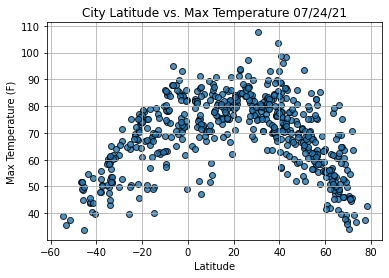

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

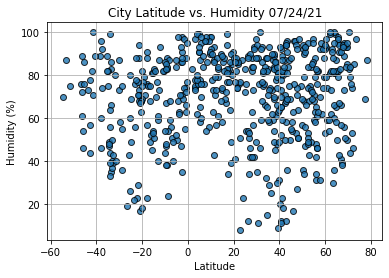

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

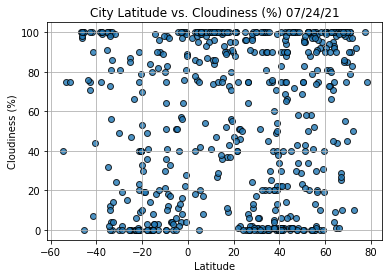

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

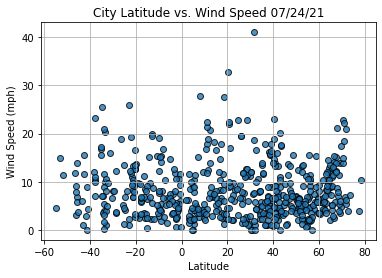

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

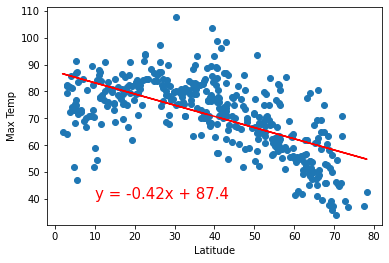

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

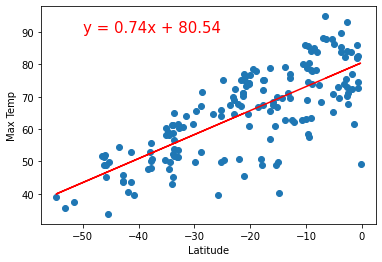

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

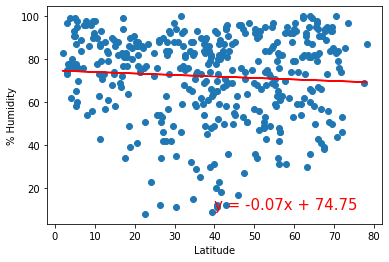

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

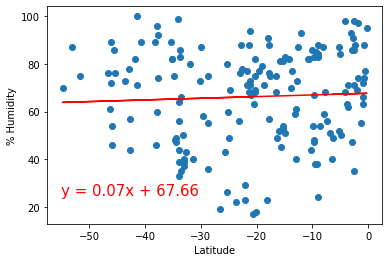

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,25))

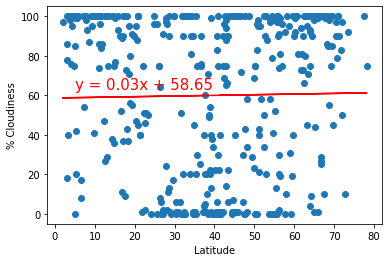

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(5,63))

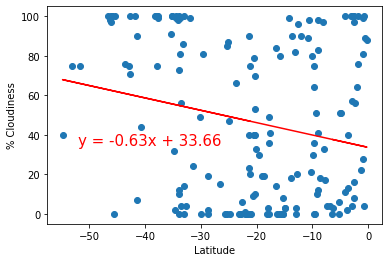

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-52,35))

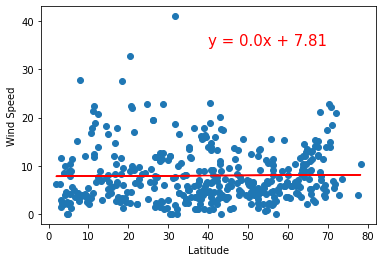

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

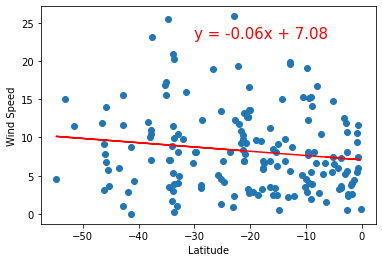

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,23))